# GRIP: THE SPARKS FOUNDATION

# Data Science and Business Analytics Internship

# Task1: Prediction Using Supervised ML

## Submitted by Mayur Asnani

In [1]:
# we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# loading data

url='http://bit.ly/w-data'
data=pd.read_csv(url)

In [4]:
print('Data imported :')
data.head(10)

Data imported :


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# preparing data

x=data.iloc[:,0]
y=data.iloc[:,-1]

In [6]:
# converting into numpy array

x=x.values
y=y.values

In [7]:
# normalising x values

u=x.mean()
std=x.std()
x=(x-u)/std

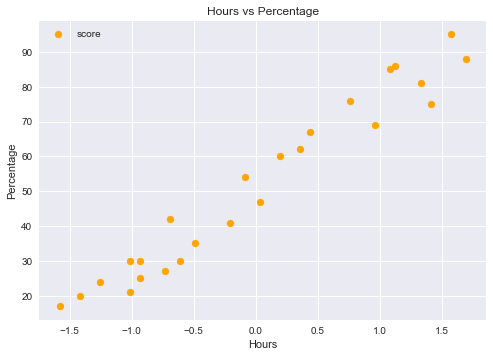

In [8]:
# visualise
plt.style.use('seaborn')
plt.scatter(x,y,color='orange',label='score')
plt.title('Hours vs Percentage')
plt.legend()
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

In [9]:
print(x.shape,y.shape)

(25,) (25,)


In [10]:
# splitting our data into training and testing

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) 

In [11]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(20,) (20,)
(5,) (5,)


# Linear Regression

In [12]:
# function 1- hypothesis

def hypothesis(x,theta):
    y_=theta[0]+theta[1]*x
    return y_

# function 2- calculates gradient for theta0 and theta1

def gradient(x,y,theta):
    m=x.shape[0]
    # initially
    grad=np.zeros((2,))
    for i in range(m):
        y_=hypothesis(x[i],theta)
        grad[0]+=(y_-y[i])
        grad[1]+=(y_-y[i])*x[i]
        
    return grad/m

# function 3- calculates error/loss function- j(theta)

def error(x,y,theta):
    m=x.shape[0]
    total_error=0.0
    for i in range(m):
        y_=hypothesis(x[i],theta)
        total_error+=(y_-y[i])**2
    return total_error/m

# function 4- gradient descent func

def gradientDescent(x,y,max_steps=100,lr=0.1):
    theta=np.zeros((2,))
    error_list=[]
    theta_list=[]
    
    for i in range(max_steps):
        # compute gradient
        grad=gradient(x,y,theta)
        # compute error
        e=error(x,y,theta)
        error_list.append(e)
        # update theta
        theta[0]=theta[0]-lr*grad[0]
        theta[1]=theta[1]-lr*grad[1]
        theta_list.append((theta[0],theta[1]))
    return theta,error_list,theta_list



In [13]:
theta,error_list,theta_list=gradientDescent(x_train,y_train)

In [14]:
print(theta)

[51.49777514 25.58570514]


In [15]:
print(error_list)

[3535.15, 2828.0439324338727, 2263.488127244841, 1812.7169735488926, 1452.7743993161905, 1165.3397298134905, 935.7909922674316, 752.4576229332185, 606.0242580745119, 489.0550462714938, 395.6141049170328, 320.96267684178713, 261.3174773816103, 213.65786012799217, 175.57193237170725, 145.13374747597905, 120.80529366076955, 101.35826873319309, 85.81164338472882, 73.38182380924164, 63.442869059168046, 55.49473283354776, 49.137909665750655, 44.05319279414099, 39.98551213917482, 36.73102916206183, 34.126831620405014, 32.042703881718616, 30.374554299703068, 29.039165619490113, 27.97000177939853, 27.113858266354573, 26.428186110904335, 25.878953870273534, 25.438939295069908, 25.086364203867596, 24.80380351459108, 24.57731329160382, 24.39573377227778, 24.250132202784318, 24.133357391734755, 24.03968354268169, 23.964525440129048, 23.904210668248865, 23.855797420265723, 23.8169287557542, 23.78571599967953, 23.760645444128777, 23.740503685743587, 23.72431786829612, 23.711307848081375, 23.700847897

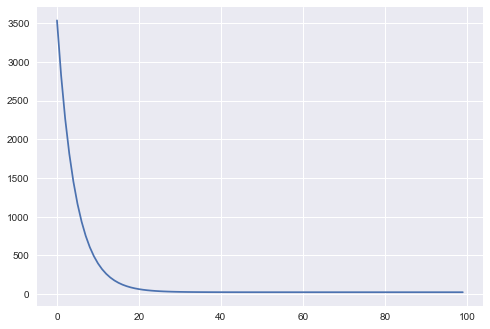

In [16]:
# visualising error

plt.plot(error_list)
plt.show()
# error is reducing


In [17]:
# making predictions and best line

y_=hypothesis(x_train,theta)
print(y_)

[60.68104148 32.75894789 71.02255762 49.30537372 62.74934471 94.80804474
 25.51988659 19.31497691 27.58818982 56.54443502 80.32992215 85.50068022
 38.96385758 11.041764   35.86140274 27.58818982 76.19331569 79.29577053
 46.20291888 91.7055899 ]


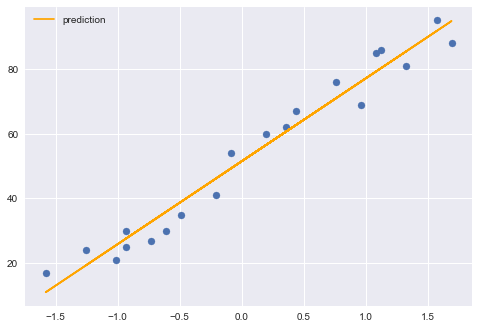

In [18]:
# best fit line

plt.scatter(x_train,y_train)
plt.plot(x_train,y_,color='orange',label='prediction')
plt.legend()
plt.show()

In [19]:
# calculating accuracy

def r2_score(y,y_):
    # numerator
    num=np.sum((y-y_)**2)
    # denomenator
    denom=np.sum((y-y.mean())**2)
    # score
    score=1-num/denom
    return score*100

print(r2_score(y_train,y_))  # 95% accurate


96.3981970702551


In [ ]:
# testing the data

In [28]:
ypred=hypothesis(x_test,theta)
print(ypred)

[33.79309951 52.40782856 15.17837045 87.56898345 25.51988659]


In [26]:
df=pd.DataFrame(y_test,columns=['Actual'])
df['Predicted']=ypred

In [27]:
df

,Actual,Predicted
0,42,33.793100
1,47,52.407829
2,20,15.178370
3,75,87.568983
4,30,25.519887


In [52]:
# training our own data

hour=float(input('enter number of hours per day? '))

print('No of hours : ',hour)


# normalising hour

hour=(hour-u)/std

pred_y=hypothesis(hour,theta)

print('Predicted score : ',pred_y)

enter number of hours per day? 9.25
No of hours :  9.25
Predicted score :  95.32512055179693
